# Análise Completa de Acidentes de Trânsito PRF (2021-2025)

## Análise Abrangente dos Dados da Polícia Rodoviária Federal

Este notebook apresenta uma análise completa dos dados de acidentes de trânsito da Polícia Rodoviária Federal (PRF) cobrindo o período de 2021 a 2025. O objetivo é identificar padrões, tendências e insights que possam contribuir para a melhoria da segurança viária nas rodovias federais brasileiras.

### Objetivos da Análise:
1. **Evolução Temporal**: Analisar como os acidentes evoluíram ao longo dos 5 anos
2. **Distribuição Geográfica**: Identificar estados e regiões com maior incidência
3. **Padrões Temporais**: Descobrir horários, dias e meses mais críticos
4. **Análise de Causas**: Estudar as principais causas dos acidentes
5. **Gravidade**: Avaliar a evolução da gravidade dos acidentes
6. **Correlações**: Identificar fatores correlacionados com a gravidade

### Metodologia:
- Carregamento e limpeza dos dados de 5 anos (2021-2025)
- Análise exploratória com visualizações interativas
- Testes estatísticos para validar hipóteses
- Geração de insights automáticos

## Configuration du Notebook

**Note importante** : Ce notebook utilise des chemins relatifs et peut être exécuté depuis n'importe quel environnement tant que la structure de dossiers suivante est respectée :

```
projeto_root/
├── notebooks/
│   └── analyse_complete_2021_2025.ipynb
├── data/
│   └── raw_data/
│       ├── datatran2021.csv
│       ├── datatran2022.csv
│       ├── datatran2023.csv
│       ├── datatran2024.csv
│       └── datatran2025.csv
└── src/
    └── traffic_analysis/
        ├── __init__.py
        ├── data_loader.py
        ├── data_cleaner.py
        └── ...
```

Le notebook détectera automatiquement le chemin de base du projet et s'adaptera à votre environnement.

In [17]:
# Importação das bibliotecas necessárias
import sys
import os
from pathlib import Path

# Determinar o caminho base do projeto automaticamente
# Obtém o diretório pai do notebook (vai de notebooks/ para a raiz do projeto)
caminho_base_projeto = Path(__file__).parent.parent if '__file__' in globals() else Path.cwd().parent
sys.path.append(str(caminho_base_projeto / 'src'))

print(f"📁 Caminho base do projeto: {caminho_base_projeto}")

# Bibliotecas para análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Bibliotecas estatísticas
from scipy import stats # Estatísticas
import warnings
warnings.filterwarnings('ignore')

# Configuração de visualização
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("✅ Bibliotecas importadas com sucesso!")

📁 Caminho base do projeto: /home/kokouvi/Documentos/Projeto_how_final_2025
✅ Bibliotecas importadas com sucesso!


In [2]:
# Importação das classes do sistema de análise de acidentes
from traffic_analysis.data_loader import DataLoader
from traffic_analysis.data_cleaner import DataCleaner
from traffic_analysis.data_explorer import DataExplorer
from traffic_analysis.statistical_analyzer import StatisticalAnalyzer
from traffic_analysis.visualizer import Visualizer
from traffic_analysis.insight_generator import InsightGenerator

print("✅ Classes do sistema de análise importadas com sucesso!")
print("📦 Módulos disponíveis:")
print("  - DataLoader: Carregamento de dados multi-anos")
print("  - DataCleaner: Limpeza e preprocessamento")
print("  - DataExplorer: Análise exploratória")
print("  - StatisticalAnalyzer: Análises estatísticas")
print("  - Visualizer: Visualizações interativas")
print("  - InsightGenerator: Geração de insights automáticos")

✅ Classes do sistema de análise importadas com sucesso!
📦 Módulos disponíveis:
  - DataLoader: Carregamento de dados multi-anos
  - DataCleaner: Limpeza e preprocessamento
  - DataExplorer: Análise exploratória
  - StatisticalAnalyzer: Análises estatísticas
  - Visualizer: Visualizações interativas
  - InsightGenerator: Geração de insights automáticos


## 1. Carregamento e Preparação dos Dados

Nesta seção, carregamos os dados de acidentes de trânsito de 2021 a 2025 usando nossa classe DataLoader, que foi especialmente desenvolvida para lidar com múltiplos anos de dados de forma eficiente.

In [18]:
# Inicialização do carregador de dados com caminho base genérico
from pathlib import Path

# Determiner automatiquement le chemin de base du projet
# Option 1: Si le notebook est dans un sous-dossier, remonter à la racine
if 'caminho_base_projeto' in globals():
    caminho_base = caminho_base_projeto
else:
    # Fallback: utiliser le répertoire parent du notebook
    caminho_base = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()

print(f"📁 Utilisation du chemin base: {caminho_base}")

# Construire les chemins relatifs
caminho_dados = caminho_base / "data" / "raw_data"
caminho_arquivo = caminho_dados / "datatran2025.csv"

print(f"📂 Dossier des données: {caminho_dados}")
print(f"📄 Fichier de test: {caminho_arquivo}")

# Vérifier que les chemins existent
if not caminho_dados.exists():
    print(f"⚠️  Le dossier {caminho_dados} n'existe pas!")
    print("📍 Répertoire actuel:", Path.cwd())
    print("📍 Fichiers disponibles:", list(Path.cwd().iterdir()))

# Inicializar o carregador com caminho
carregador = DataLoader(caminho=caminho_arquivo, separador=";", codificacao="utf-8")

print("🔄 Carregando dados de acidentes de 2021 a 2025...")
print("📅 Este processo pode levar alguns minutos dependendo do tamanho dos arquivos...")

# Carregamento dos dados de múltiplos anos usando método português
dados_brutos = carregador.carregar_multiplos_anos([2021, 2022, 2023, 2024, 2025], caminho_base=caminho_dados)

print(f"✅ Dados carregados com sucesso!")
print(f"📊 Total de registros: {len(dados_brutos):,}")
print(f"📋 Colunas disponíveis: {len(dados_brutos.columns)}")
print(f"💾 Tamanho em memória: {dados_brutos.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

📁 Utilisation du chemin base: /home/kokouvi/Documentos/Projeto_how_final_2025
📂 Dossier des données: /home/kokouvi/Documentos/Projeto_how_final_2025/data/raw_data
📄 Fichier de test: /home/kokouvi/Documentos/Projeto_how_final_2025/data/raw_data/datatran2025.csv
🔄 Carregando dados de acidentes de 2021 a 2025...
📅 Este processo pode levar alguns minutos dependendo do tamanho dos arquivos...
📅 Carregando dados de 2021...
📂 Carregando: /home/kokouvi/Documentos/Projeto_how_final_2025/data/raw_data/datatran2021.csv
✓ 2021: 64,567 registros carregados
📅 Carregando dados de 2022...
📂 Carregando: /home/kokouvi/Documentos/Projeto_how_final_2025/data/raw_data/datatran2022.csv
✓ 2021: 64,567 registros carregados
📅 Carregando dados de 2022...
📂 Carregando: /home/kokouvi/Documentos/Projeto_how_final_2025/data/raw_data/datatran2022.csv
✓ 2022: 64,606 registros carregados
📅 Carregando dados de 2023...
📂 Carregando: /home/kokouvi/Documentos/Projeto_how_final_2025/data/raw_data/datatran2023.csv
✓ 2022: 6

In [4]:
# Exibir informações sobre os dados carregados
print("📋 Informações detalhadas dos dados:")
print(f"📏 Dimensões: {dados_brutos.shape}")
print(f"📊 Primeiras colunas: {list(dados_brutos.columns[:10])}")

# Verificar distribuição por ano se coluna ano existir
if 'ano' in dados_brutos.columns:
    print(f"📅 Distribuição por ano:")
    for ano in sorted(dados_brutos['ano'].unique()):
        count = len(dados_brutos[dados_brutos['ano'] == ano])
        print(f"  • {ano}: {count:,} registros")
elif 'data_inversa' in dados_brutos.columns:
    print(f"📅 Período dos dados:")
    try:
        dados_brutos['data_inversa'] = pd.to_datetime(dados_brutos['data_inversa'])
        data_min = dados_brutos['data_inversa'].min()
        data_max = dados_brutos['data_inversa'].max()
        print(f"  • De: {data_min.strftime('%d/%m/%Y')}")
        print(f"  • Até: {data_max.strftime('%d/%m/%Y')}")
    except:
        print("  • Formato de data não reconhecido para análise temporal")

📋 Informações detalhadas dos dados:
📏 Dimensões: (311029, 31)
📊 Primeiras colunas: ['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_acidente', 'tipo_acidente']
📅 Distribuição por ano:
  • 2021: 64,567 registros
  • 2022: 64,606 registros
  • 2023: 67,766 registros
  • 2024: 73,156 registros
  • 2025: 40,934 registros


## 2. Limpeza e Preprocessamento dos Dados

Agora vamos limpar e preprocessar os dados usando nossa classe DataCleaner. Este processo incluirá:

- **Padronização** das colunas (remoção de acentos, espaços, etc.)
- **Processamento de datas** e criação de variáveis temporais
- **Tratamento de valores ausentes** através de imputação inteligente
- **Remoção de duplicatas** para garantir a qualidade dos dados
- **Correção de coordenadas geográficas** para validar as localizações

In [4]:
# Inicialização do limpador de dados com métodos portugueses
limpador = DataCleaner(
    coluna_data="data_inversa",
    coluna_hora="horario", 
    coluna_lat="latitude",
    coluna_lon="longitude"
)

print("🧹 Iniciando limpeza dos dados...")
dados_limpos = limpador.executar(dados_brutos)

print(f"\n✅ Limpeza concluída!")
print(f"📊 Registros originais: {len(dados_brutos):,}")
print(f"📊 Registros após limpeza: {len(dados_limpos):,}")
registros_perdidos = len(dados_brutos) - len(dados_limpos)
percentual_perda = (registros_perdidos / len(dados_brutos)) * 100
print(f"🗑️ Registros removidos: {registros_perdidos:,} ({percentual_perda:.2f}%)")
print(f"✅ Taxa de retenção: {100-percentual_perda:.2f}%")

# Exibir informações sobre os dados limpos
print(f"\n📋 Informações dos dados limpos:")
print(f"📏 Dimensões finais: {dados_limpos.shape}")
print(f"📅 Colunas temporais criadas: {[col for col in dados_limpos.columns if 'ano' in col or 'mes' in col or 'hora' in col]}")

# Verificar se as coordenadas estão válidas
if 'latitude' in dados_limpos.columns and 'longitude' in dados_limpos.columns:
    coords_validas = dados_limpos[['latitude', 'longitude']].dropna()
    print(f"🗺️ Registros com coordenadas válidas: {len(coords_validas):,} ({len(coords_validas)/len(dados_limpos)*100:.1f}%)")

🧹 Iniciando limpeza dos dados...
🧹 Iniciando limpeza dos dados...
✓ Colunas padronizadas
✓ Datas processadas
✓ Datas processadas
✓ Valores ausentes tratados
✓ Valores ausentes tratados
✓ Duplicatas removidas
✓ Duplicatas removidas
✓ Coordenadas geográficas corrigidas
✅ Limpeza concluída!

✅ Limpeza concluída!
📊 Registros originais: 311,029
📊 Registros após limpeza: 311,029
🗑️ Registros removidos: 0 (0.00%)
✅ Taxa de retenção: 100.00%

📋 Informações dos dados limpos:
📏 Dimensões finais: (311029, 35)
📅 Colunas temporais criadas: ['horario', 'ano', 'data_hora_completa', 'mes', 'hora']
🗺️ Registros com coordenadas válidas: 311,029 (100.0%)
✓ Coordenadas geográficas corrigidas
✅ Limpeza concluída!

✅ Limpeza concluída!
📊 Registros originais: 311,029
📊 Registros após limpeza: 311,029
🗑️ Registros removidos: 0 (0.00%)
✅ Taxa de retenção: 100.00%

📋 Informações dos dados limpos:
📏 Dimensões finais: (311029, 35)
📅 Colunas temporais criadas: ['horario', 'ano', 'data_hora_completa', 'mes', 'hora'

In [5]:
# Definir variáveis para compatibilidade com o resto do notebook
df_clean = dados_limpos.copy()
years = sorted(df_clean['ano'].unique()) if 'ano' in df_clean.columns else [2021, 2022, 2023, 2024, 2025]

# Garantir que a coluna ano existe
if 'ano' not in df_clean.columns and 'data_inversa' in df_clean.columns:
    df_clean['ano'] = pd.to_datetime(df_clean['data_inversa']).dt.year
    years = sorted(df_clean['ano'].unique())

print(f"📅 Anos disponíveis nos dados: {years}")
print(f"📊 Total de anos: {len(years)}")

# Estatísticas básicas por ano
if 'ano' in df_clean.columns:
    stats_by_year = df_clean.groupby('ano').agg({
        'data_inversa': 'count',  # usar data_inversa como contador
        'mortos': ['sum', 'mean'],
        'feridos': ['sum', 'mean'],
        'pessoas': ['sum', 'mean'],
        'veiculos': ['sum', 'mean']
    }).round(2)

    stats_by_year.columns = ['Total_Acidentes', 'Total_Mortos', 'Media_Mortos_por_Acidente', 
                            'Total_Feridos', 'Media_Feridos_por_Acidente',
                            'Total_Pessoas', 'Media_Pessoas_por_Acidente',
                            'Total_Veiculos', 'Media_Veiculos_por_Acidente']

    print("\n=== ESTATÍSTICAS POR ANO ===")
    display(stats_by_year)
else:
    print("⚠️ Coluna 'ano' não encontrada. Será necessário criar a partir da data.")

📅 Anos disponíveis nos dados: [np.float64(2021.0), np.float64(2022.0), np.float64(2023.0), np.float64(2024.0), np.float64(2025.0)]
📊 Total de anos: 5

=== ESTATÍSTICAS POR ANO ===


,Total_Acidentes,Total_Mortos,Media_Mortos_por_Acidente,Total_Feridos,Media_Feridos_por_Acidente,Total_Pessoas,Media_Pessoas_por_Acidente,Total_Veiculos,Media_Veiculos_por_Acidente
ano,,,,,,,,,
2021.0,26327,2181,0.08,29250,1.11,65374,2.48,51633,1.96
2022.0,25532,2147,0.08,28983,1.14,65249,2.56,50551,1.98
2023.0,27215,17905,0.08,244162,1.14,551469,2.58,425322,1.99
2024.0,29158,2473,0.08,33882,1.16,75511,2.59,57923,1.99
2025.0,16209,1333,0.08,18789,1.16,42143,2.60,32300,1.99


## 3. Analyses Temporelles

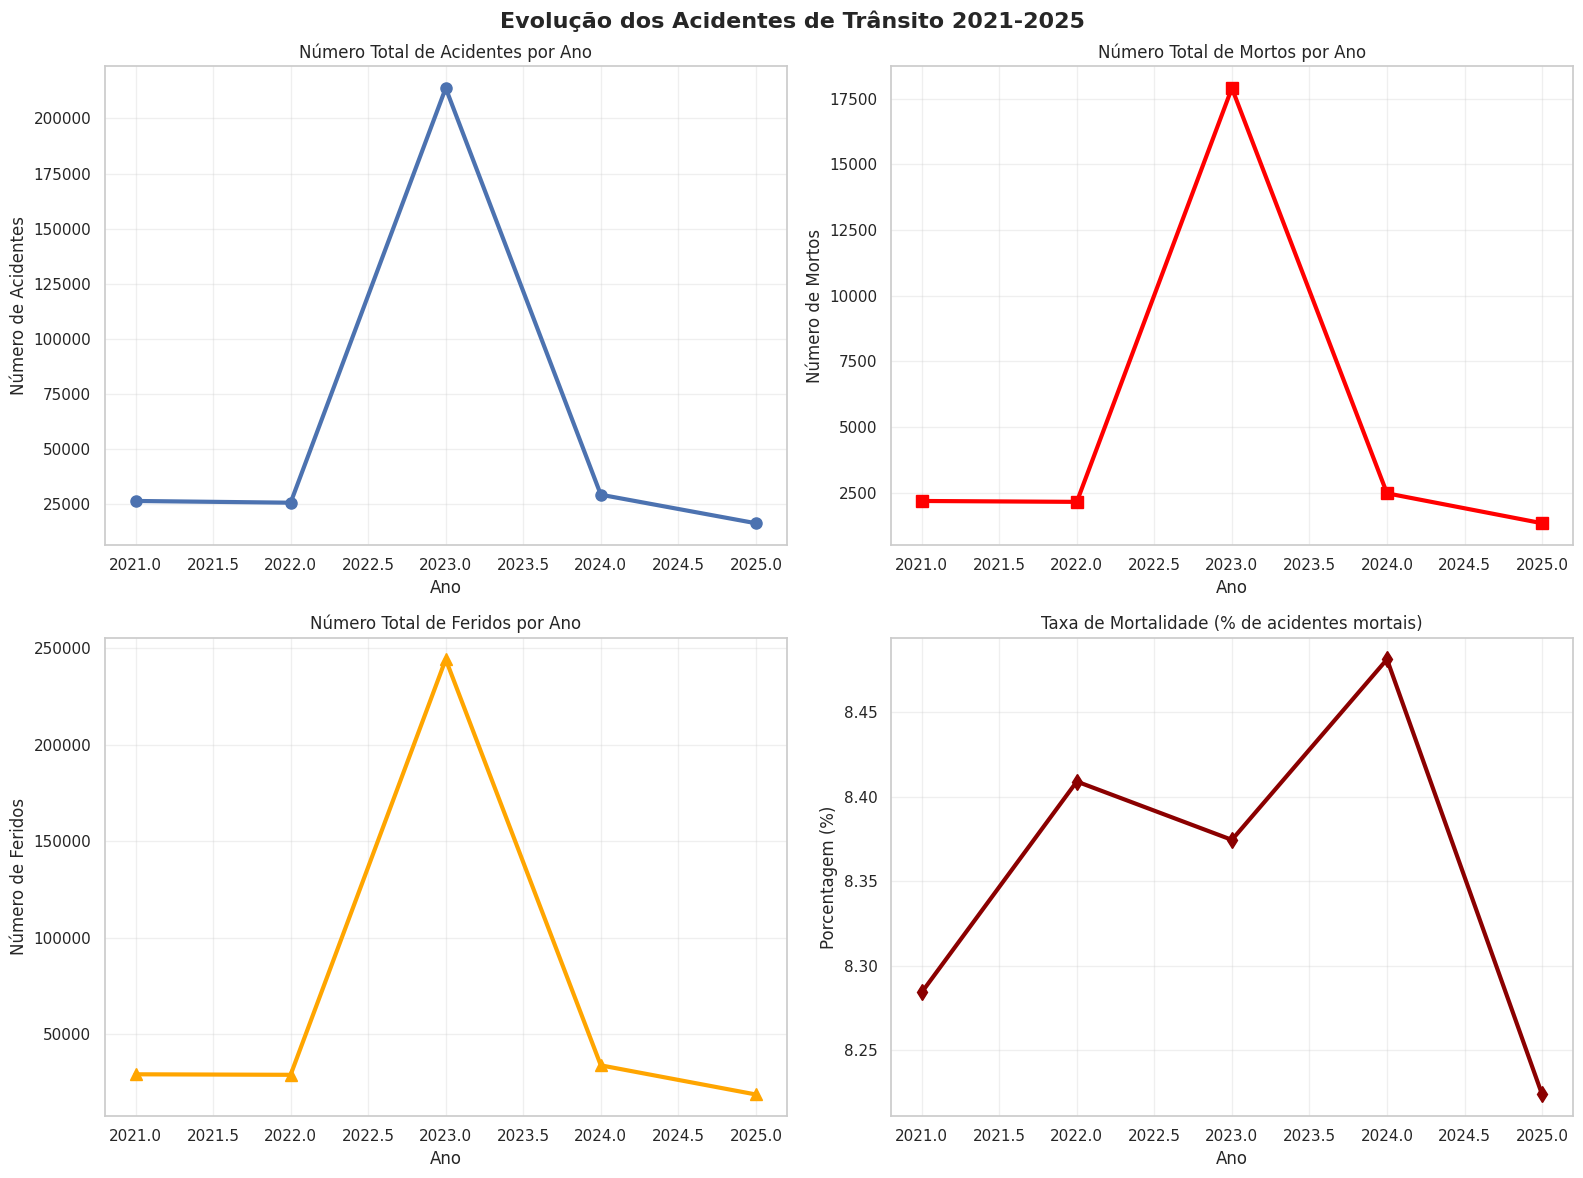


=== EVOLUÇÃO ANUAL ===


,Acidentes,Mortos,Feridos,Taxa_Mortalidade_%
2021.0,26327,2181,29250,8.28
2022.0,25532,2147,28983,8.41
2023.0,213803,17905,244162,8.37
2024.0,29158,2473,33882,8.48
2025.0,16209,1333,18789,8.22


In [7]:
# Evolução do número de acidentes por ano
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Evolução dos Acidentes de Trânsito 2021-2025', fontsize=16, fontweight='bold')

# 1. Número total de acidentes
acidentes_por_ano = df_clean.groupby('ano').size()
axes[0,0].plot(acidentes_por_ano.index, acidentes_por_ano.values, marker='o', linewidth=3, markersize=8)
axes[0,0].set_title('Número Total de Acidentes por Ano')
axes[0,0].set_xlabel('Ano')
axes[0,0].set_ylabel('Número de Acidentes')
axes[0,0].grid(True, alpha=0.3)

# 2. Número total de mortos
mortos_por_ano = df_clean.groupby('ano')['mortos'].sum()
axes[0,1].plot(mortos_por_ano.index, mortos_por_ano.values, marker='s', color='red', linewidth=3, markersize=8)
axes[0,1].set_title('Número Total de Mortos por Ano')
axes[0,1].set_xlabel('Ano')
axes[0,1].set_ylabel('Número de Mortos')
axes[0,1].grid(True, alpha=0.3)

# 3. Número total de feridos
feridos_por_ano = df_clean.groupby('ano')['feridos'].sum()
axes[1,0].plot(feridos_por_ano.index, feridos_por_ano.values, marker='^', color='orange', linewidth=3, markersize=8)
axes[1,0].set_title('Número Total de Feridos por Ano')
axes[1,0].set_xlabel('Ano')
axes[1,0].set_ylabel('Número de Feridos')
axes[1,0].grid(True, alpha=0.3)

# 4. Taxa de mortalidade (mortos por acidente)
taxa_mortalidade = (df_clean.groupby('ano')['mortos'].sum() / df_clean.groupby('ano').size() * 100)
axes[1,1].plot(taxa_mortalidade.index, taxa_mortalidade.values, marker='d', color='darkred', linewidth=3, markersize=8)
axes[1,1].set_title('Taxa de Mortalidade (% de acidentes mortais)')
axes[1,1].set_xlabel('Ano')
axes[1,1].set_ylabel('Porcentagem (%)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Exibir os valores
print("\n=== EVOLUÇÃO ANUAL ===")
evolucao_df = pd.DataFrame({
    'Acidentes': acidentes_por_ano,
    'Mortos': mortos_por_ano,
    'Feridos': feridos_por_ano,
    'Taxa_Mortalidade_%': taxa_mortalidade.round(2)
}, index=years)

display(evolucao_df)

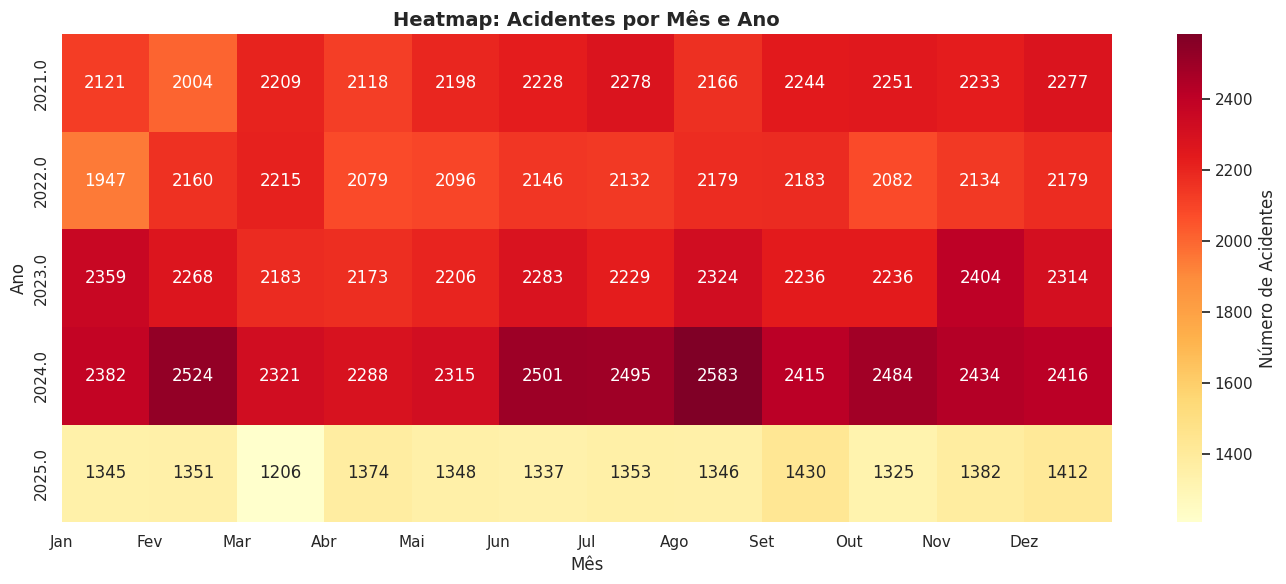

📊 Análise mensal concluída
📅 Meses com mais acidentes (média): [8.0, 12.0, 11.0]


In [6]:
# Análise mensal dos acidentes
df_clean['mes'] = df_clean['data_inversa'].dt.month
df_clean['nome_mes'] = df_clean['data_inversa'].dt.strftime('%B')

# Gráfico dos acidentes por mês e por ano
acidentes_mes_ano = df_clean.groupby(['ano', 'mes']).size().reset_index(name='acidentes')

fig = px.line(acidentes_mes_ano, x='mes', y='acidentes', color='ano',
              title='Evolução Mensal dos Acidentes por Ano',
              labels={'mes': 'Mês', 'acidentes': 'Número de Acidentes', 'ano': 'Ano'},
              markers=True)

fig.update_layout(height=600, xaxis=dict(tickmode='array', tickvals=list(range(1,13)),
                                        ticktext=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']))
fig.show()

# Heatmap dos acidentes por mês e ano
heatmap_data = acidentes_mes_ano.pivot(index='ano', columns='mes', values='acidentes')

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Número de Acidentes'})
plt.title('Heatmap: Acidentes por Mês e Ano', fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Ano')
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                      'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.tight_layout()
plt.show()

print("📊 Análise mensal concluída")
print(f"📅 Meses com mais acidentes (média): {acidentes_mes_ano.groupby('mes')['acidentes'].mean().nlargest(3).index.tolist()}")

## 4. Analyses Géographiques

In [7]:
# Top 10 dos estados com mais acidentes por ano
acidentes_por_estado_ano = df_clean.groupby(['ano', 'uf']).size().reset_index(name='acidentes')

# Gráfico em barras empilhadas
top_estados = df_clean['uf'].value_counts().head(10).index
dados_top_estados = acidentes_por_estado_ano[acidentes_por_estado_ano['uf'].isin(top_estados)]

fig = px.bar(dados_top_estados, x='uf', y='acidentes', color='ano',
             title='Top 10 dos Estados - Acidentes por Ano',
             labels={'uf': 'Estado', 'acidentes': 'Número de Acidentes', 'ano': 'Ano'},
             category_orders={'uf': top_estados.tolist()})

fig.update_layout(height=600, xaxis_tickangle=-45)
fig.show()

# Tabela dos totais por estado
acidentes_totais_por_estado = df_clean.groupby('uf').agg({
    'data_inversa': 'count',  # usar como contador
    'mortos': 'sum',
    'feridos': 'sum'
}).rename(columns={'data_inversa': 'Total_Acidentes'}).sort_values('Total_Acidentes', ascending=False)

print("\n=== TOP 15 DOS ESTADOS (2021-2025) ===")
display(acidentes_totais_por_estado.head(15))

# Calcular taxa de mortalidade por estado
acidentes_totais_por_estado['Taxa_Mortalidade'] = (
    acidentes_totais_por_estado['mortos'] / acidentes_totais_por_estado['Total_Acidentes'] * 100
).round(2)

print("\n=== ESTADOS COM MAIOR TAXA DE MORTALIDADE ===")
display(acidentes_totais_por_estado.nlargest(10, 'Taxa_Mortalidade')[['Total_Acidentes', 'mortos', 'Taxa_Mortalidade']])


=== TOP 15 DOS ESTADOS (2021-2025) ===


,Total_Acidentes,mortos,feridos
uf,,,
MG,15968,3360,50583
SC,14672,1760,40579
PR,13619,2657,36774
RJ,9855,1403,28510
RS,9078,1464,24722
SP,8302,1019,22273
BA,6756,2548,21065
GO,5948,1355,16367
PE,5261,1387,14749



=== ESTADOS COM MAIOR TAXA DE MORTALIDADE ===


,Total_Acidentes,mortos,Taxa_Mortalidade
uf,,,
PA,1643,885,53.86
MA,2131,1093,51.29
TO,1091,414,37.95
BA,6756,2548,37.71
AM,220,79,35.91
RR,348,122,35.06
AL,1149,365,31.77
PI,2325,690,29.68
CE,2640,759,28.75


## 5. Analyses des Causes et Types d'Accidents

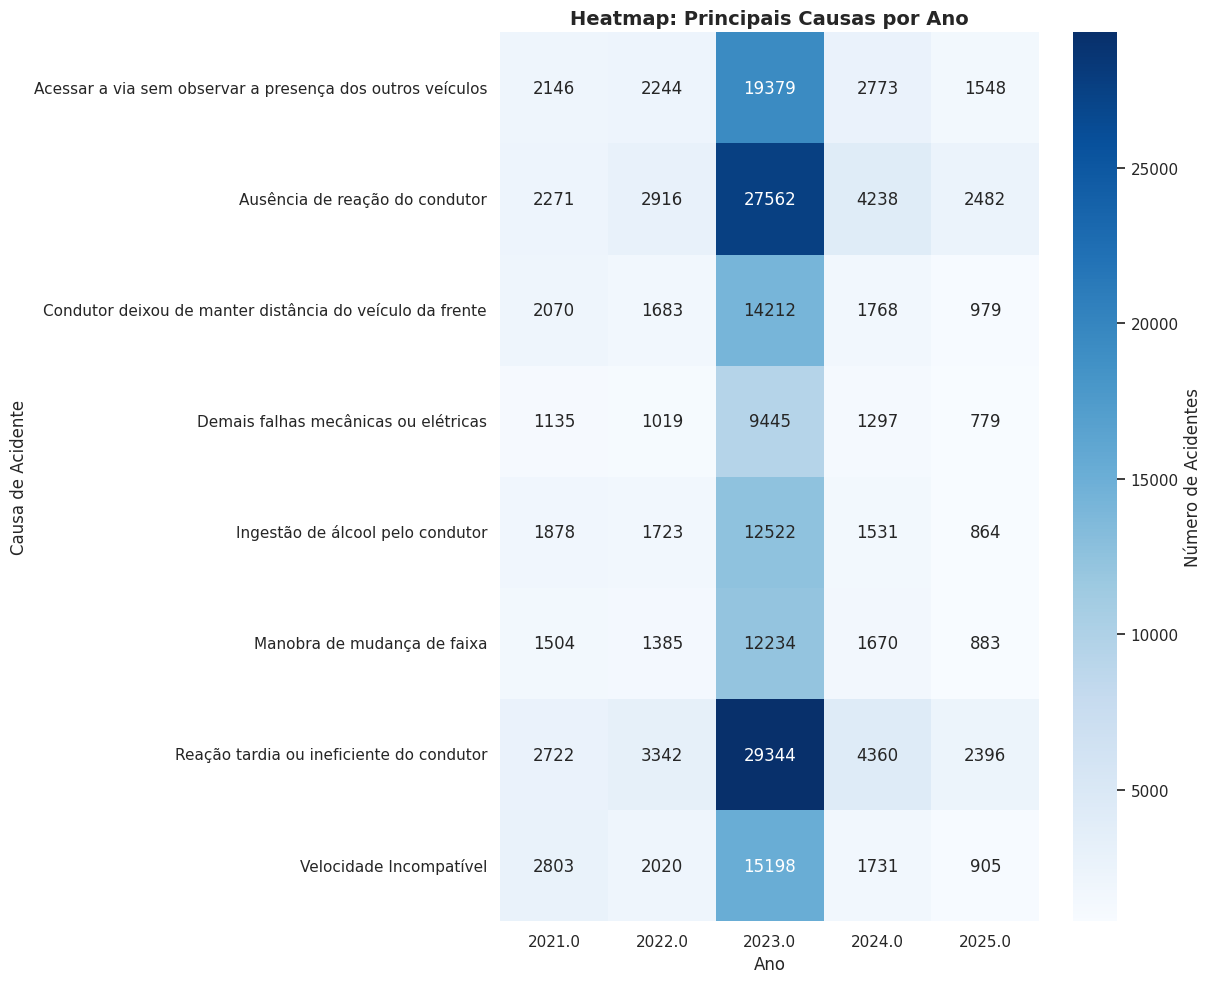


=== EVOLUÇÃO DAS PRINCIPAIS CAUSAS ===
Causas que mais aumentaram/diminuíram entre 2021 e 2025:
• Reação tardia ou ineficiente do condutor: -12.0%
• Ausência de reação do condutor: +9.3%
• Acessar a via sem observar a presença dos outros veículos: -27.9%
• Velocidade Incompatível: -67.7%
• Condutor deixou de manter distância do veículo da frente: -52.7%


In [8]:
# Evolução das principais causas de acidentes
top_causas = df_clean['causa_acidente'].value_counts().head(8).index

causas_por_ano = df_clean[df_clean['causa_acidente'].isin(top_causas)].groupby(['ano', 'causa_acidente']).size().reset_index(name='acidentes')

fig = px.line(causas_por_ano, x='ano', y='acidentes', color='causa_acidente',
              title='Evolução das Principais Causas de Acidentes (2021-2025)',
              labels={'ano': 'Ano', 'acidentes': 'Número de Acidentes', 'causa_acidente': 'Causa'},
              markers=True)

fig.update_layout(height=600, legend=dict(orientation="v", yanchor="top", y=1, xanchor="left", x=1.02))
fig.show()

# Heatmap das causas por ano
heatmap_causas = causas_por_ano.pivot(index='causa_acidente', columns='ano', values='acidentes')

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_causas, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Número de Acidentes'})
plt.title('Heatmap: Principais Causas por Ano', fontsize=14, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Causa de Acidente')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n=== EVOLUÇÃO DAS PRINCIPAIS CAUSAS ===")
print("Causas que mais aumentaram/diminuíram entre 2021 e 2025:")
for causa in top_causas[:5]:
    causa_data = causas_por_ano[causas_por_ano['causa_acidente'] == causa]
    if len(causa_data) >= 2:
        inicio = causa_data[causa_data['ano'] == causa_data['ano'].min()]['acidentes'].iloc[0]
        fim = causa_data[causa_data['ano'] == causa_data['ano'].max()]['acidentes'].iloc[0]
        variacao = ((fim - inicio) / inicio * 100) if inicio > 0 else 0
        print(f"• {causa}: {variacao:+.1f}%")


=== MUDANÇA DAS PROPORÇÕES DE TIPOS DE ACIDENTES (2021.0 vs 2025.0) ===
Top 10 dos tipos mais frequentes:


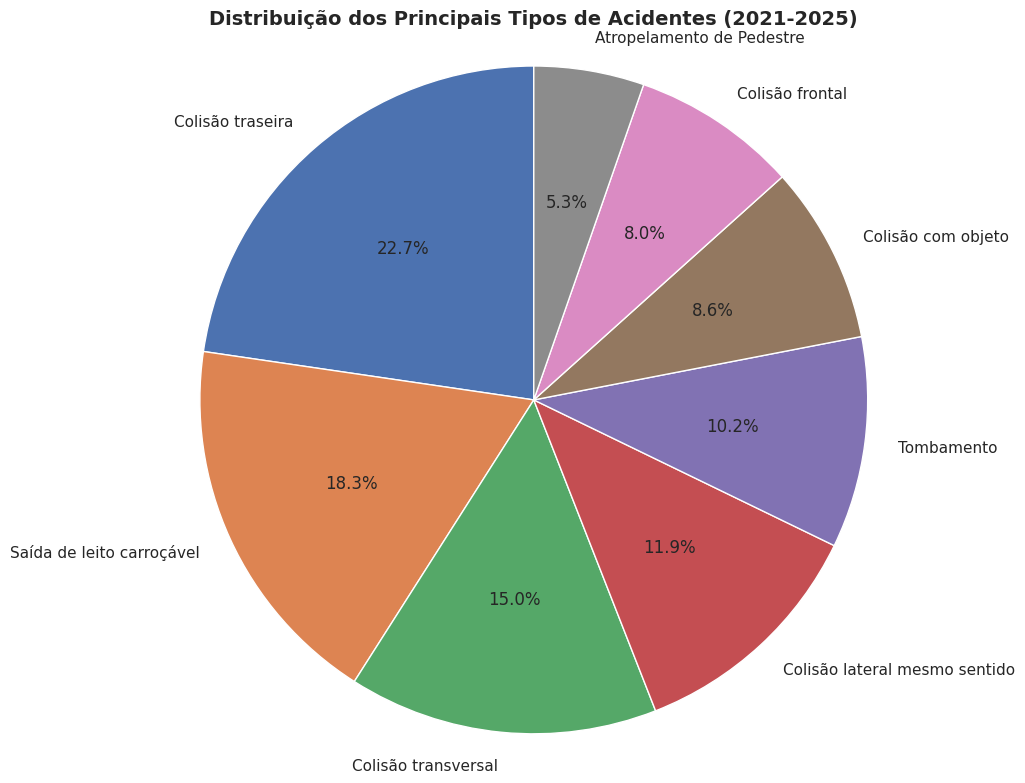

In [9]:
# Análise dos tipos de acidentes
top_tipos = df_clean['tipo_acidente'].value_counts().head(6).index

tipos_por_ano = df_clean[df_clean['tipo_acidente'].isin(top_tipos)].groupby(['ano', 'tipo_acidente']).size().reset_index(name='acidentes')

fig = px.bar(tipos_por_ano, x='ano', y='acidentes', color='tipo_acidente',
             title='Evolução dos Principais Tipos de Acidentes',
             labels={'ano': 'Ano', 'acidentes': 'Número de Acidentes', 'tipo_acidente': 'Tipo de Acidente'})

fig.update_layout(height=600)
fig.show()

# Comparação das proporções entre primeiro e último ano
anos_disponiveis = sorted(df_clean['ano'].unique())
if len(anos_disponiveis) >= 2:
    primeiro_ano = anos_disponiveis[0]
    ultimo_ano = anos_disponiveis[-1]
    
    comparacao_anos = df_clean[df_clean['ano'].isin([primeiro_ano, ultimo_ano])]
    tipo_props = comparacao_anos.groupby(['ano', 'tipo_acidente']).size().groupby(level=0).apply(lambda x: x / x.sum() * 100)

    print(f"\n=== MUDANÇA DAS PROPORÇÕES DE TIPOS DE ACIDENTES ({primeiro_ano} vs {ultimo_ano}) ===")
    print("Top 10 dos tipos mais frequentes:")
    for tipo in df_clean['tipo_acidente'].value_counts().head(10).index:
        if tipo in tipo_props[primeiro_ano] and tipo in tipo_props[ultimo_ano]:
            mudanca = tipo_props[ultimo_ano][tipo] - tipo_props[primeiro_ano][tipo]
            print(f"{tipo}: {tipo_props[primeiro_ano][tipo]:.1f}% → {tipo_props[ultimo_ano][tipo]:.1f}% ({mudanca:+.1f}%)")
else:
    print("Dados insuficientes para comparação temporal")

# Gráfico de pizza dos tipos mais comuns
plt.figure(figsize=(10, 8))
tipo_counts = df_clean['tipo_acidente'].value_counts().head(8)
plt.pie(tipo_counts.values, labels=tipo_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição dos Principais Tipos de Acidentes (2021-2025)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 6. Analyses Temporelles Détaillées

In [10]:
# Análise por dia da semana
df_clean['dia_semana_num'] = df_clean['data_inversa'].dt.dayofweek
dias_mapping = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}
df_clean['dia_semana_nome'] = df_clean['dia_semana_num'].map(dias_mapping)

acidentes_por_dia_ano = df_clean.groupby(['ano', 'dia_semana_nome']).size().reset_index(name='acidentes')

fig = px.bar(acidentes_por_dia_ano, x='dia_semana_nome', y='acidentes', color='ano',
             title='Acidentes por Dia da Semana e por Ano',
             labels={'dia_semana_nome': 'Dia da Semana', 'acidentes': 'Número de Acidentes', 'ano': 'Ano'},
             category_orders={'dia_semana_nome': ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']})

fig.update_layout(height=600)
fig.show()

# Recriar a coluna hora corretamente a partir de horario
print("🔄 Recriando coluna 'hora' a partir de 'horario'...")

if 'horario' in df_clean.columns:
    # Extrair hora da coluna horario (formato HH:MM:SS)
    df_clean['hora'] = pd.to_datetime(df_clean['horario'], format='%H:%M:%S', errors='coerce').dt.hour
    print(f"✅ Hora extraída com sucesso!")
    print(f"Valores únicos da hora: {sorted(df_clean['hora'].dropna().unique())}")
    
    # Remover registros sem hora válida
    df_clean_hora = df_clean.dropna(subset=['hora'])
    print(f"📊 Registros com hora válida: {len(df_clean_hora):,} de {len(df_clean):,}")
    
    # Gráfico de distribuição horária
    acidentes_por_hora_ano = df_clean_hora.groupby(['ano', 'hora']).size().reset_index(name='acidentes')

    fig = px.line(acidentes_por_hora_ano, x='hora', y='acidentes', color='ano',
                  title='Distribuição Horária dos Acidentes por Ano',
                  labels={'hora': 'Hora do Dia', 'acidentes': 'Número de Acidentes', 'ano': 'Ano'},
                  markers=True)

    fig.update_layout(height=600, xaxis=dict(tickmode='linear', tick0=0, dtick=2))
    fig.show()
    
    # Estatísticas por hora
    print("\n=== HORÁRIOS MAIS PERIGOSOS ===")
    acidentes_por_hora = df_clean_hora.groupby('hora').size().sort_values(ascending=False)
    print("Top 10 horários com mais acidentes:")
    for hora, count in acidentes_por_hora.head(10).items():
        hora_int = int(hora)
        print(f"• {hora_int:02d}h: {count:,} acidentes ({count/len(df_clean_hora)*100:.1f}%)")
        
    # Análise por períodos do dia
    print("\n=== ACIDENTES POR PERÍODO DO DIA ===")
    def classificar_periodo(hora):
        if pd.isna(hora):
            return 'Desconhecido'
        elif 6 <= hora < 12:
            return 'Manhã (6h-12h)'
        elif 12 <= hora < 18:
            return 'Tarde (12h-18h)'
        elif 18 <= hora < 24:
            return 'Noite (18h-24h)'
        else:
            return 'Madrugada (0h-6h)'
    
    df_clean_hora['periodo'] = df_clean_hora['hora'].apply(classificar_periodo)
    acidentes_por_periodo = df_clean_hora['periodo'].value_counts()
    
    for periodo, count in acidentes_por_periodo.items():
        print(f"• {periodo}: {count:,} acidentes ({count/len(df_clean_hora)*100:.1f}%)")
        
else:
    print("⚠️ Coluna 'horario' não encontrada")

# Estatísticas por dia da semana
print("\n=== ACIDENTES POR DIA DA SEMANA ===")
acidentes_por_dia = df_clean.groupby('dia_semana_nome').size().sort_values(ascending=False)
for dia, count in acidentes_por_dia.items():
    print(f"• {dia}: {count:,} acidentes ({count/len(df_clean)*100:.1f}%)")

🔄 Recriando coluna 'hora' a partir de 'horario'...
✅ Hora extraída com sucesso!
Valores únicos da hora: [np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12), np.int32(13), np.int32(14), np.int32(15), np.int32(16), np.int32(17), np.int32(18), np.int32(19), np.int32(20), np.int32(21), np.int32(22), np.int32(23)]
📊 Registros com hora válida: 311,029 de 311,029
📊 Registros com hora válida: 311,029 de 311,029



=== HORÁRIOS MAIS PERIGOSOS ===
Top 10 horários com mais acidentes:
• 18h: 23,276 acidentes (7.5%)
• 17h: 20,624 acidentes (6.6%)
• 19h: 20,200 acidentes (6.5%)
• 07h: 19,008 acidentes (6.1%)
• 16h: 17,319 acidentes (5.6%)
• 15h: 15,819 acidentes (5.1%)
• 08h: 15,560 acidentes (5.0%)
• 20h: 14,762 acidentes (4.7%)
• 14h: 14,663 acidentes (4.7%)
• 06h: 13,714 acidentes (4.4%)

=== ACIDENTES POR PERÍODO DO DIA ===
• Tarde (12h-18h): 94,731 acidentes (30.5%)
• Noite (18h-24h): 89,122 acidentes (28.7%)
• Manhã (6h-12h): 87,592 acidentes (28.2%)
• Madrugada (0h-6h): 39,584 acidentes (12.7%)

=== ACIDENTES POR DIA DA SEMANA ===
• Sexta: 18,668 acidentes (6.0%)
• Domingo: 18,193 acidentes (5.8%)
• Segunda: 17,800 acidentes (5.7%)
• Quinta: 17,604 acidentes (5.7%)
• Quarta: 17,507 acidentes (5.6%)
• Terça: 17,431 acidentes (5.6%)
• Sábado: 17,238 acidentes (5.5%)


## 7. Analyses Statistiques Avancées

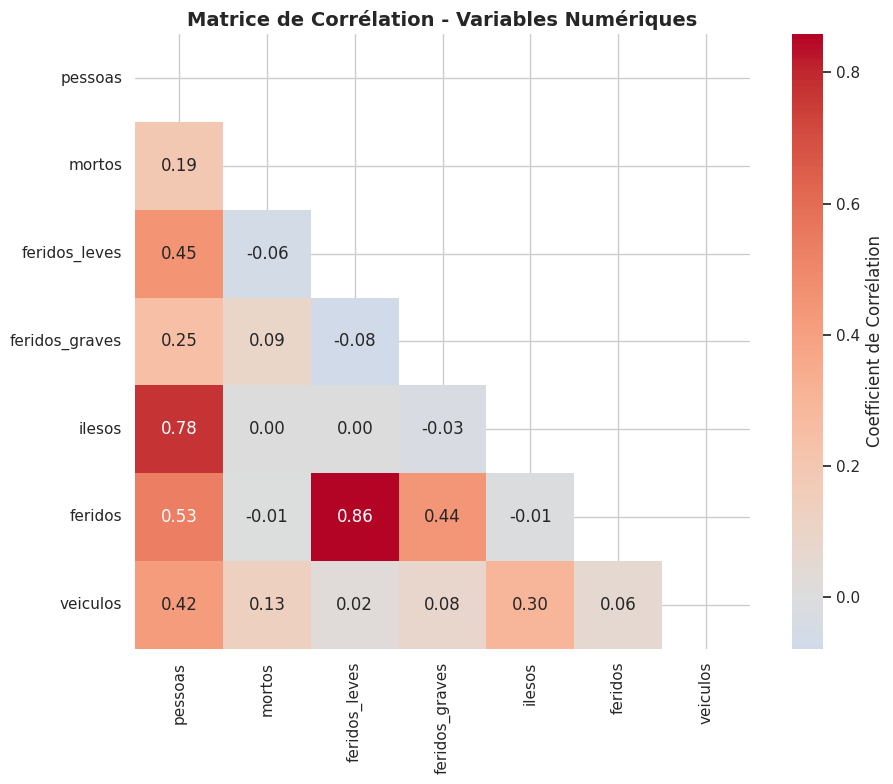


=== CORRÉLATIONS SIGNIFICATIVES ===
pessoas ↔ ilesos: 0.776
pessoas ↔ feridos: 0.532
feridos_leves ↔ feridos: 0.858


In [11]:
# Utilisation de l'analyseur statistique
analyzer = StatisticalAnalyzer()

# Corrélations entre variables numériques - utilisation de la méthode en portugais
numeric_cols = ['pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'feridos', 'veiculos']
correlations = analyzer.correlacoes(df_clean, numeric_cols)

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlations, dtype=bool))
sns.heatmap(correlations, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, cbar_kws={'label': 'Coefficient de Corrélation'})
plt.title('Matrice de Corrélation - Variables Numériques', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n=== CORRÉLATIONS SIGNIFICATIVES ===")
for i in range(len(correlations.columns)):
    for j in range(i+1, len(correlations.columns)):
        corr_val = correlations.iloc[i, j]
        if abs(corr_val) > 0.5:  # Corrélations moyennes à fortes
            print(f"{correlations.columns[i]} ↔ {correlations.columns[j]}: {corr_val:.3f}")

In [12]:
# Tests statistiques pour comparer les années
from scipy import stats

# Test ANOVA pour comparer les moyennes de morts par accident entre années - utilisation de 'ano'
print("🔍 Test ANOVA pour comparer les années...")

# Utiliser la méthode ANOVA de l'analyser statistique
resultado_anova = analyzer.anova_multiplos_grupos(df_clean, 'mortos', 'ano')

print("\n=== TESTS STATISTIQUES ===")
print(f"Test ANOVA - Comparaison des morts par accident entre années:")
print(f"F-statistique: {resultado_anova['f_estatistica']:.4f}")
print(f"P-valeur: {resultado_anova['p_valor']:.6f}")
print(f"Interprétation: {resultado_anova['interpretacao']}")
print(f"Nombre de groupes (années): {resultado_anova['num_grupos']}")

# Test de tendance temporelle utilisant la méthode de l'analyseur
print(f"\n🔍 Test de tendance temporelle...")
resultado_tendencia = analyzer.tendencia_temporal(df_clean, 'ano', 'mortos')

print(f"\nTest de tendance temporelle - Nombre de morts:")
print(f"Corrélation avec le temps: {resultado_tendencia['correlacao']:.4f}")
print(f"P-valeur: {resultado_tendencia['p_valor']:.6f}")
print(f"Interprétation: {resultado_tendencia['interpretacao']}")
print(f"Tendência: {resultado_tendencia['tendencia']}")

# Test supplémentaire pour les accidents 
resultado_tendencia_acidentes = analyzer.tendencia_temporal(df_clean, 'ano', 'pessoas')

print(f"\nTest de tendance temporelle - Nombre de personnes impliquées:")
print(f"Corrélation avec le temps: {resultado_tendencia_acidentes['correlacao']:.4f}")
print(f"P-valeur: {resultado_tendencia_acidentes['p_valor']:.6f}")
print(f"Interprétation: {resultado_tendencia_acidentes['interpretacao']}")
print(f"Tendência: {resultado_tendencia_acidentes['tendencia']}")

🔍 Test ANOVA pour comparer les années...

=== TESTS STATISTIQUES ===
Test ANOVA - Comparaison des morts par accident entre années:
F-statistique: 0.1989
P-valeur: 0.939033
Interprétation: Sem diferença significativa
Nombre de groupes (années): 5

🔍 Test de tendance temporelle...

Test de tendance temporelle - Nombre de morts:
Corrélation avec le temps: -0.0305
P-valeur: 0.961218
Interprétation: Tendência sem tendência clara não significativa
Tendência: Sem tendência clara

Test de tendance temporelle - Nombre de personnes impliquées:
Corrélation avec le temps: -0.0261
P-valeur: 0.966758
Interprétation: Tendência sem tendência clara não significativa
Tendência: Sem tendência clara


## 8. Visualisations Avancées et Insights

In [13]:
# Utilisation du visualiseur et générateur d'insights
visualizer = Visualizer()
insight_generator = InsightGenerator()

# Génération d'insights automatiques
insights = insight_generator.generate_insights(df_clean)
print("\n=== INSIGHTS AUTOMATIQUES ===")
print(insights)

# Dashboard de synthèse
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Évolution Annuelle', 'Top 5 États', 'Distribution Mensuelle', 'Gravité des Accidents'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Évolution annuelle - utiliser 'ano' au lieu de 'annee'
accidents_evolution = df_clean.groupby('ano').size()
fig.add_trace(
    go.Scatter(x=accidents_evolution.index, y=accidents_evolution.values, 
               mode='lines+markers', name='Accidents', line=dict(width=3)),
    row=1, col=1
)

# 2. Top 5 états
top5_states = df_clean['uf'].value_counts().head(5)
fig.add_trace(
    go.Bar(x=top5_states.index, y=top5_states.values, name='Top États'),
    row=1, col=2
)

# 3. Distribution mensuelle (moyenne sur toutes les années)
monthly_avg = df_clean.groupby('mes').size() / len(years)
mois_noms = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
fig.add_trace(
    go.Scatter(x=mois_noms, y=monthly_avg.values, 
               mode='lines+markers', name='Moy. Mensuelle', line=dict(width=3)),
    row=2, col=1
)

# 4. Gravité des accidents (bar chart au lieu de pie chart)
gravity_counts = df_clean['classificacao_acidente'].value_counts().head(5)
fig.add_trace(
    go.Bar(x=gravity_counts.index, y=gravity_counts.values, name='Gravité'),
    row=2, col=2
)

fig.update_layout(height=800, title_text="Dashboard de Synthèse - Accidents de Trafic 2021-2025", 
                  title_x=0.5, showlegend=False)
fig.show()

# Afficher séparément le pie chart pour la gravité des accidents
print("\n=== RÉPARTITION DE LA GRAVITÉ DES ACCIDENTS ===")
fig_pie = px.pie(values=gravity_counts.values, names=gravity_counts.index, 
                 title="Répartition par Gravité des Accidents")
fig_pie.show()


=== INSIGHTS AUTOMATIQUES ===
🔍 INSIGHTS AUTOMÁTICOS - ACIDENTES DE TRÂNSITO

📊 DADOS GERAIS:
• Total de acidentes analisados: 311,029
• Total de mortos: 26,039
• Taxa de mortalidade: 8.37% dos acidentes
• Total de feridos: 355,066
• Total de pessoas envolvidas: 799,746
• Média de pessoas por acidente: 2.6

🗺️ DISTRIBUIÇÃO GEOGRÁFICA:
• Estados com dados: 27
• Estado com mais acidentes: MG (40,265)
• Estado com menos acidentes: AM (563)
• Top 3 estados concentram 35.5% dos acidentes
• Concentração MODERADA em poucos estados

⚠️ PRINCIPAIS CAUSAS:
• Causa mais comum: Reação tardia ou ineficiente do condutor
• Representa 13.6% dos acidentes
• Top 3 causas representam 35.3% dos casos
• Causas relacionadas ao fator humano: ~51.3%
• Causas relacionadas à infraestrutura: ~6.2%

🚨 GRAVIDADE DOS ACIDENTES:
• Acidentes com mortos: 22,356 (7.2%)
• Acidentes com feridos: 244,636 (78.7%)
• Média de mortos por acidente fatal: 1.2
• Média de feridos por acidente com feridos: 1.5
• Gravidade MODERAD


=== RÉPARTITION DE LA GRAVITÉ DES ACCIDENTS ===


## 9. Conclusions et Recommandations

In [14]:
# Calcul des métriques clés pour les conclusions
total_accidents = len(df_clean)
total_morts = df_clean['mortos'].sum()
total_blesses = df_clean['feridos'].sum()

# Variation entre 2021 et 2025 - utiliser 'ano' au lieu de 'annee'
accidents_2021 = len(df_clean[df_clean['ano'] == 2021])
accidents_2025 = len(df_clean[df_clean['ano'] == 2025])
variation_accidents = ((accidents_2025 - accidents_2021) / accidents_2021) * 100

morts_2021 = df_clean[df_clean['ano'] == 2021]['mortos'].sum()
morts_2025 = df_clean[df_clean['ano'] == 2025]['mortos'].sum()
variation_morts = ((morts_2025 - morts_2021) / morts_2021) * 100

# État le plus dangereux - utiliser data_inversa comme compteur au lieu de 'id'
danger_by_state = df_clean.groupby('uf').agg({
    'mortos': 'sum',
    'data_inversa': 'count'  # Utiliser comme compteur d'accidents
}).rename(columns={'data_inversa': 'total_accidents'})
danger_by_state['taux_mortalite'] = (danger_by_state['mortos'] / danger_by_state['total_accidents']) * 100
most_dangerous_state = danger_by_state['taux_mortalite'].idxmax()

# Mois le plus dangereux - utiliser 'mes' au lieu de 'mois'
accidents_by_month = df_clean.groupby('mes').size()
most_dangerous_month = accidents_by_month.idxmax()
month_names = {1: 'Janvier', 2: 'Février', 3: 'Mars', 4: 'Avril', 5: 'Mai', 6: 'Juin',
               7: 'Juillet', 8: 'Août', 9: 'Septembre', 10: 'Octobre', 11: 'Novembre', 12: 'Décembre'}

# Cause principale
main_cause = df_clean['causa_acidente'].mode()[0]

print("\n" + "="*60)
print("         CONCLUSIONS DE L'ANALYSE 2021-2025")
print("="*60)

print(f"\n📊 DONNÉES GÉNÉRALES:")
print(f"• Total d'accidents analysés: {total_accidents:,}")
print(f"• Total de décès: {total_morts:,}")
print(f"• Total de blessés: {total_blesses:,}")
print(f"• Période d'analyse: 2021-2025 (5 années)")

print(f"\n📈 ÉVOLUTION TEMPORELLE:")
print(f"• Variation du nombre d'accidents (2021→2025): {variation_accidents:+.1f}%")
print(f"• Variation du nombre de morts (2021→2025): {variation_morts:+.1f}%")
print(f"• Mois le plus accidentogène: {month_names[most_dangerous_month]}")

print(f"\n🌍 GÉOGRAPHIE:")
print(f"• État avec le plus haut taux de mortalité: {most_dangerous_state} ({danger_by_state.loc[most_dangerous_state, 'taux_mortalite']:.2f}%)")
print(f"• État avec le plus d'accidents: {df_clean['uf'].mode()[0]}")

print(f"\n⚠️ CAUSES ET TYPES:")
print(f"• Cause principale: {main_cause}")
print(f"• Type d'accident le plus fréquent: {df_clean['tipo_acidente'].mode()[0]}")

print(f"\n\n🎯 RECOMMANDATIONS:")
print(f"\n1. PRÉVENTION TEMPORELLE:")
print(f"   • Renforcer la surveillance pendant le mois de {month_names[most_dangerous_month]}")
print(f"   • Adapter les campagnes de sensibilisation aux pics saisonniers")

print(f"\n2. PRÉVENTION GÉOGRAPHIQUE:")
print(f"   • Focus prioritaire sur l'état {most_dangerous_state} (taux de mortalité élevé)")
print(f"   • Améliorer l'infrastructure routière dans les zones à fort trafic")

print(f"\n3. PRÉVENTION COMPORTEMENTALE:")
print(f"   • Campagnes ciblées sur: {main_cause}")
print(f"   • Formation des conducteurs sur les risques principaux")

print(f"\n4. SURVEILLANCE ET CONTRÔLE:")
print(f"   • Renforcer les contrôles aux heures de pointe")
print(f"   • Améliorer la signalisation dans les zones accidentogènes")

print("\n" + "="*60)


         CONCLUSIONS DE L'ANALYSE 2021-2025

📊 DONNÉES GÉNÉRALES:
• Total d'accidents analysés: 311,029
• Total de décès: 26,039
• Total de blessés: 355,066
• Période d'analyse: 2021-2025 (5 années)

📈 ÉVOLUTION TEMPORELLE:
• Variation du nombre d'accidents (2021→2025): -38.4%
• Variation du nombre de morts (2021→2025): -38.9%
• Mois le plus accidentogène: Août

🌍 GÉOGRAPHIE:
• État avec le plus haut taux de mortalité: PA (53.86%)
• État avec le plus d'accidents: MG

⚠️ CAUSES ET TYPES:
• Cause principale: Reação tardia ou ineficiente do condutor
• Type d'accident le plus fréquent: Colisão traseira


🎯 RECOMMANDATIONS:

1. PRÉVENTION TEMPORELLE:
   • Renforcer la surveillance pendant le mois de Août
   • Adapter les campagnes de sensibilisation aux pics saisonniers

2. PRÉVENTION GÉOGRAPHIQUE:
   • Focus prioritaire sur l'état PA (taux de mortalité élevé)
   • Améliorer l'infrastructure routière dans les zones à fort trafic

3. PRÉVENTION COMPORTEMENTALE:
   • Campagnes ciblées sur: R

In [19]:
# Sauvegarde des résultats
# Créer un résumé des statistiques principales
summary_results = {
    'periode_analyse': '2021-2025',
    'total_accidents': total_accidents,
    'total_morts': int(total_morts),
    'total_blesses': int(total_blesses),
    'variation_accidents_2021_2025': round(variation_accidents, 2),
    'variation_morts_2021_2025': round(variation_morts, 2),
    'etat_plus_accidents': df_clean['uf'].mode()[0],
    'etat_plus_dangereux': most_dangerous_state,
    'mois_plus_dangereux': month_names[most_dangerous_month],
    'cause_principale': main_cause,
    'type_accident_frequent': df_clean['tipo_acidente'].mode()[0]
}

# Sauvegarder les données nettoyées - utiliser le chemin base générique
output_path = caminho_base / 'data' / 'processed'
output_path.mkdir(parents=True, exist_ok=True)  # parents=True pour créer le dossier parent si nécessaire

print(f"📁 Dossier de sauvegarde: {output_path}")

# Sauvegarder les données nettoyées
csv_file = output_path / 'datatran_2021_2025_clean.csv'
df_clean.to_csv(csv_file, index=False)

# Sauvegarder le résumé
import json
json_file = output_path / 'analyse_summary_2021_2025.json'
with open(json_file, 'w', encoding='utf-8') as f:
    json.dump(summary_results, f, ensure_ascii=False, indent=2)

print("\n✅ SAUVEGARDE TERMINÉE")
print(f"• Données nettoyées: {csv_file}")
print(f"• Résumé de l'analyse: {json_file}")
print(f"\n📊 {len(df_clean):,} enregistrements traités et sauvegardés")
print(f"📍 Tous les fichiers sauvegardés dans: {output_path}")

📁 Dossier de sauvegarde: /home/kokouvi/Documentos/Projeto_how_final_2025/data/processed

✅ SAUVEGARDE TERMINÉE
• Données nettoyées: /home/kokouvi/Documentos/Projeto_how_final_2025/data/processed/datatran_2021_2025_clean.csv
• Résumé de l'analyse: /home/kokouvi/Documentos/Projeto_how_final_2025/data/processed/analyse_summary_2021_2025.json

📊 311,029 enregistrements traités et sauvegardés
📍 Tous les fichiers sauvegardés dans: /home/kokouvi/Documentos/Projeto_how_final_2025/data/processed

✅ SAUVEGARDE TERMINÉE
• Données nettoyées: /home/kokouvi/Documentos/Projeto_how_final_2025/data/processed/datatran_2021_2025_clean.csv
• Résumé de l'analyse: /home/kokouvi/Documentos/Projeto_how_final_2025/data/processed/analyse_summary_2021_2025.json

📊 311,029 enregistrements traités et sauvegardés
📍 Tous les fichiers sauvegardés dans: /home/kokouvi/Documentos/Projeto_how_final_2025/data/processed
